In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 🔨 Preparación del modelo

In [2]:
data = pd.read_csv('datav2.csv', sep=';', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(99919, 6)
['tipo_persona', 'codigo_actividad_economica', 'tipo_cotizante', 'subtipo_cotizante', 'edad', 'target']


### ✄ Selección de features a usar

In [3]:
data_final = data[['tipo_persona', 'codigo_actividad_economica', 'subtipo_cotizante', 
                   'tipo_cotizante', 'edad', 'target']]


### ▶ Conversión de datos letras a numeros

In [4]:
data_final['tipo_persona'].value_counts()

J    75907
N    24012
Name: tipo_persona, dtype: int64

In [5]:
# Juridica = 1
data_final.loc[data_final['tipo_persona']== 'J', 'tipo_persona'] = 1
data_final.head()

,tipo_persona,codigo_actividad_economica,subtipo_cotizante,tipo_cotizante,edad,target
0,N,7490,0,3,54,0
1,N,8299,3,3,74,0
2,1,125,0,1,45,0
3,N,4290,0,59,40,0
4,1,6910,0,1,49,0


In [6]:
# Natural = 0
data_final.loc[data_final['tipo_persona']== 'N', 'tipo_persona'] = 0
data_final.head()

,tipo_persona,codigo_actividad_economica,subtipo_cotizante,tipo_cotizante,edad,target
0,0,7490,0,3,54,0
1,0,8299,3,3,74,0
2,1,125,0,1,45,0
3,0,4290,0,59,40,0
4,1,6910,0,1,49,0


### ✂ División de datos en entrenamiento y pruebas

In [7]:
from sklearn.model_selection import train_test_split 

y = data_final.target
X = data_final.drop('target', axis=1)

# Division de datos en 70:30  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
print("type of y_train:", type(y_train))
print("Número de transactiones en el dataset X_train: ", X_train.shape) 
print("Número de transactiones en el dataset y_train: ", y_train.shape) 
print("Número de transactiones en el dataset X_test: ", X_test.shape) 
print("Número de transactiones en el dataset y_test: ", y_test.shape) 

type of y_train: <class 'pandas.core.series.Series'>
Número de transactiones en el dataset X_train:  (69943, 5)
Número de transactiones en el dataset y_train:  (69943,)
Número de transactiones en el dataset X_test:  (29976, 5)
Número de transactiones en el dataset y_test:  (29976,)


### ≈ Sobre - Muestreo y balanceo de datos

Se generan observaciones sintéticas mediante muestreo aleatorio con reemplazo para balancear los datos.

In [8]:
print("Antes del sobre-muestreo, contador etiqueta 'Fraude': {}".format(sum(data_final.target == 1))) 
print("Antes del sobre-muestreo, contador etiqueta 'No Fraude': {} \n".format(sum(data_final.target  == 0)))

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('Despues del sobre-muestreo, la forma de x_train es: {}'.format(X_train_res.shape)) 
print('Despues del sobre-muestreo, la forma de y_train es: {} \n'.format(y_train_res.shape)) 
print("Despues del sobre-muestreo, contador etiqueta 'Fraude': {}".format(sum(y_train_res == 1))) 
print("Despues del sobre-muestreo, contador etiqueta 'No Fraude': {}".format(sum(y_train_res == 0)))

Antes del sobre-muestreo, contador etiqueta 'Fraude': 5572
Antes del sobre-muestreo, contador etiqueta 'No Fraude': 94347 

Despues del sobre-muestreo, la forma de x_train es: (132148, 5)
Despues del sobre-muestreo, la forma de y_train es: (132148,) 

Despues del sobre-muestreo, contador etiqueta 'Fraude': 66074
Despues del sobre-muestreo, contador etiqueta 'No Fraude': 66074


### ✂ Eliminación recursiva de features (RFE)

Dado que ya contamos con un número de features adecuado y que contamos con un nivel de certeza amplio sobre la correlación de las variables e incidencia en nueestra variable objetivo entonces, no realizaremos una elminaci´ñon de features. Algunas de las caracteristicas de los features actiales son:

* Las variables son independientes.
* Su selección está basada en las reglas de negocio brindadas por el experto.
* Tienen alta correlación con el fraude. Se demostró en la etapa de feature engineering.

In [9]:
columnas_finales = X_train_res.columns
os_data_X = pd.DataFrame(data = X_train_res, columns = columnas_finales)
os_data_y = pd.DataFrame(data = y_train_res, columns=['target'])
X = os_data_X[columnas_finales]
y = os_data_y['target']

# ✅ Implementación del modelo

In [10]:
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.205279
         Iterations 8
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.704     
Dependent Variable:      target              AIC:                 54264.3766
Date:                    2020-05-25 14:39    BIC:                 54313.3350
No. Observations:        132148              Log-Likelihood:      -27127.   
Df Model:                4                   LL-Null:             -91598.   
Df Residuals:            132143              LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                            Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
tipo_

In [11]:
print(result.conf_int())

                                   0         1
tipo_persona                0.226013  0.315462
codigo_actividad_economica -0.000013  0.000001
subtipo_cotizante           1.895178  1.936384
tipo_cotizante             -0.043320 -0.038963
edad                       -0.079756 -0.076883


## 👁 Observaciones

* Los **p-valores** para la mayoria de las variables son **menores que 0.05*
* Las variables **tipo_planilla** y **clase_riesgo** fueron eliminados. Su p-valor era de **0.4132** y **0.4319** respectivamente.

In [12]:
columnas_finalesv2 = ['tipo_persona', 'codigo_actividad_economica', 'subtipo_cotizante', 'tipo_cotizante', 'edad']
os_data_X_v2 = pd.DataFrame(data = X_train_res, columns = columnas_finalesv2)
os_data_y_v2 = pd.DataFrame(data = y_train_res, columns=['target'])
X = os_data_X_v2[columnas_finalesv2]
y = os_data_y_v2['target']

In [13]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.205279
         Iterations 8


## 🤖 Resultado modelo

In [14]:
print(result.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.704     
Dependent Variable:      target              AIC:                 54264.3766
Date:                    2020-05-25 14:41    BIC:                 54313.3350
No. Observations:        132148              Log-Likelihood:      -27127.   
Df Model:                4                   LL-Null:             -91598.   
Df Residuals:            132143              LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                            Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
tipo_persona                0.2707   0.0228   11.8646 0.0000  0.2260  0.3155
codigo_actividad_economica -0.

## ⏭ Evaluación del modelo

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Presición

In [17]:
y_pred = logreg.predict(X_test)
print('Presición del modelo con datos de prueba: {:.2f}'.format(logreg.score(X_test, y_test)))

Presición del modelo con datos de prueba: 0.93


#### Matriz de confusión

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[18714  1032]
 [ 1663 18236]]


In [23]:
print("Total predicciones: {}".format(confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1]))
print("Predicciones correctas: {}".format(confusion_matrix[0][0] + confusion_matrix[1][1]))
print("Predicciones incorrectas: {}".format(confusion_matrix[0][1] + confusion_matrix[1][0]))

Total predicciones: 39645
Predicciones correctas: 36950
Predicciones incorrectas: 2695


#### Presición de calculo y tasas

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     19746
           1       0.95      0.92      0.93     19899

    accuracy                           0.93     39645
   macro avg       0.93      0.93      0.93     39645
weighted avg       0.93      0.93      0.93     39645



* Del 100% de los datos de prueba el 92% se clasificaron correctamente.

### 📈 Umbral de discriminación

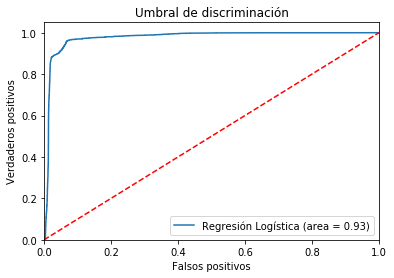

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Umbral de discriminación')
plt.legend(loc="lower right")
plt.show()

## 🔢 Coeficientes

In [27]:
print(result.conf_int())

                                   0         1
tipo_persona                0.226013  0.315462
codigo_actividad_economica -0.000013  0.000001
subtipo_cotizante           1.895178  1.936384
tipo_cotizante             -0.043320 -0.038963
edad                       -0.079756 -0.076883


## 🔣 Definición matemática

Ya tenemos un modelo listo para usar. Pero antes, damos un definición matemática para modelarlo en un lenguaje de programación y desplegarlo en un ambiente productivo.
Para este estudio vamos a:
* Formular el modelo de forma **matemática.**
* Crear y exponer un **servicio web (API)** desde donde pueda **consumir el modelo** mediante peticiones http.
* Diseñar y desarrollar una **interfaz gráfica de usuario** que use el modelo de forma transparente para el usuario mediante un formulario.
* Realizar simulaciones.

### Función Sigmoidal

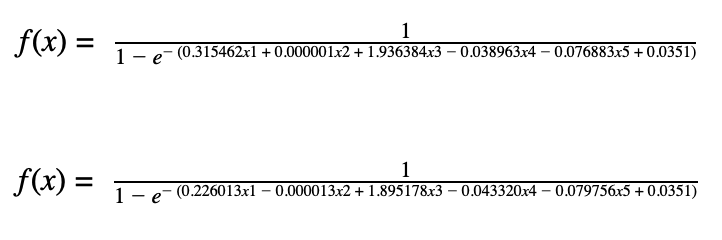

### 🔌 Pruebas Unitarias

In [4]:
import math
def test_y1(x1, x2, x3, x4, x5):
    potencia = 0.315462*x1 + 0.000001*x2 + 1.936384*x3 - 0.038963*x4 - 0.076883*x5 + 0.0351
    result = 1 / (1 + math.exp(-(potencia)))
    print("result1 = ", result)

def test_y0(x1, x2, x3, x4, x5):
    potencia = 0.226013*x1 - 0.000013*x2 + 1.895178*x3 - 0.043320*x4 - 0.079756*x5 + 0.0351
    result = 1 / (1 + math.exp(-(potencia)))
    print("result2 = ", result)

In [5]:
tipo_persona = 1
codigo_actividad_economica = 8211
subtipo_cotizante = 3
tipo_cotizante = 1
edad = 86

x1, x2, x3, x4, x5 = tipo_persona, codigo_actividad_economica, subtipo_cotizante, tipo_cotizante, edad

test_y1(x1, x2, x3, x4, x5)
test_y0(x1, x2, x3, x4, x5)

result1 =  0.3815496328515203
result2 =  0.2568449707158648
